In [1]:
# import sys
# sys.path.append("../../utils")
from utils.generate_field import *
# from visualize import *
import numpy as np
from pathlib import Path

# Initial condition for scalar
This file is created to record how and what kind of initial condition is created for the scalar field.

In [2]:
# HPC Options ['Fermi', ]
server = 'Fermi'

if server=='Fermi':
    dir = '/home/zyou6474/Projects/lesgo_adjoint_tutorial_bundle/tests/inputs/'

# Test case with smaller mesh 

In [3]:
dims = [16, 16, 16]
domain = [2*np.pi, np.pi, 1]

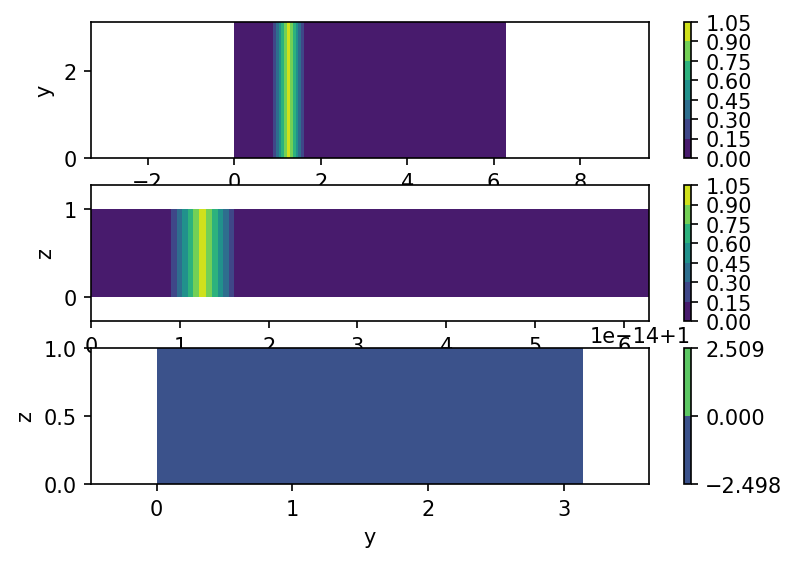

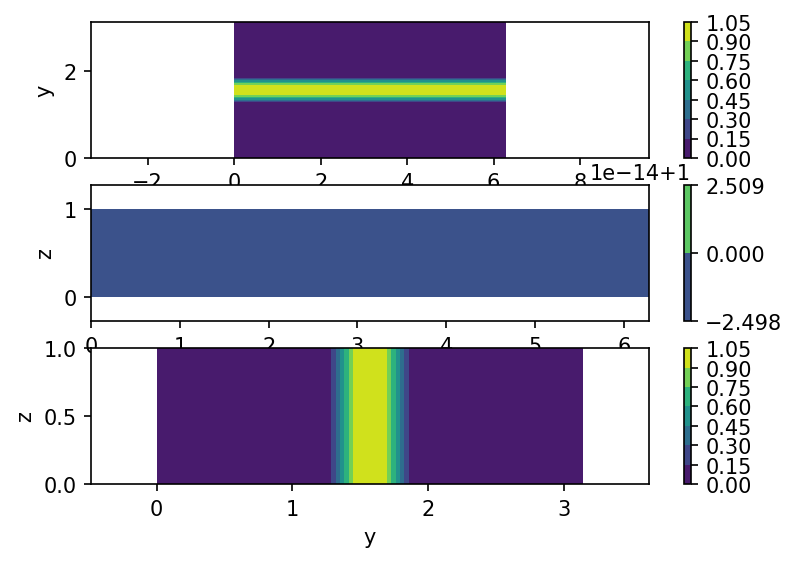

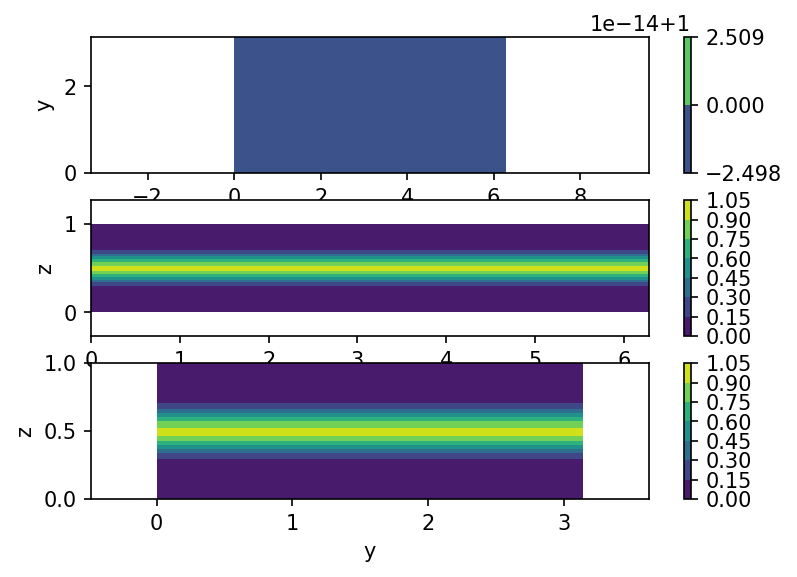

In [4]:
path = dir + 'test_1d'
Path(path).mkdir(parents=True, exist_ok=True)
fig = write_array_to_file(path + '/theta.IC.01', gaussian_ic(domain, dims, mu_L=np.array([0.2, 0.5, 0.5]), ho_axis='x'), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.2, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.02', gaussian_ic(domain, dims, mu_L=np.array([0.5, 0.5, 0.5]), ho_axis='y'), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.5, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.03', gaussian_ic(domain, dims, mu_L=np.array([0.8, 0.5, 0.5]), ho_axis='z'), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.8, 0.5, 0.5]))


## Mesh dimensions of [128, 128, 64]

### 3D gaussian source
The gaussian source initial condition at different source location $\boldsymbol{x}_0 = (x_0, y_0, z_0)$ could be expressed as

$$
T = 
$$

In [5]:
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]

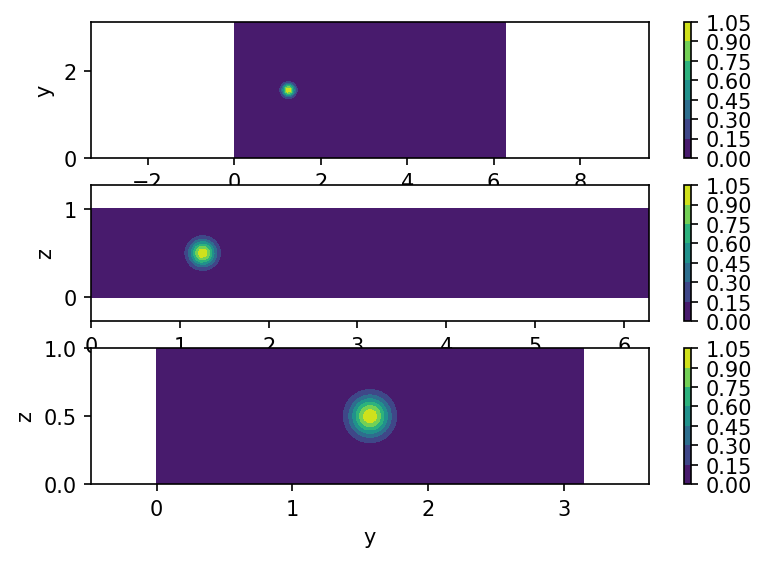

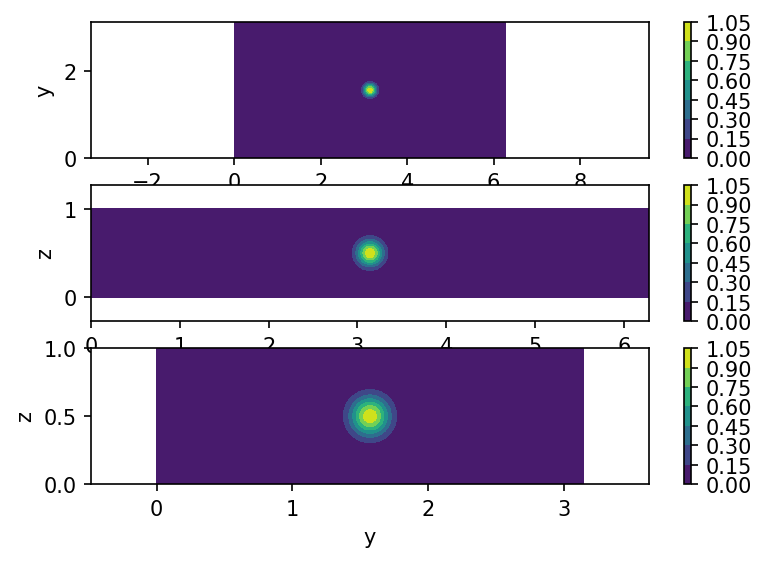

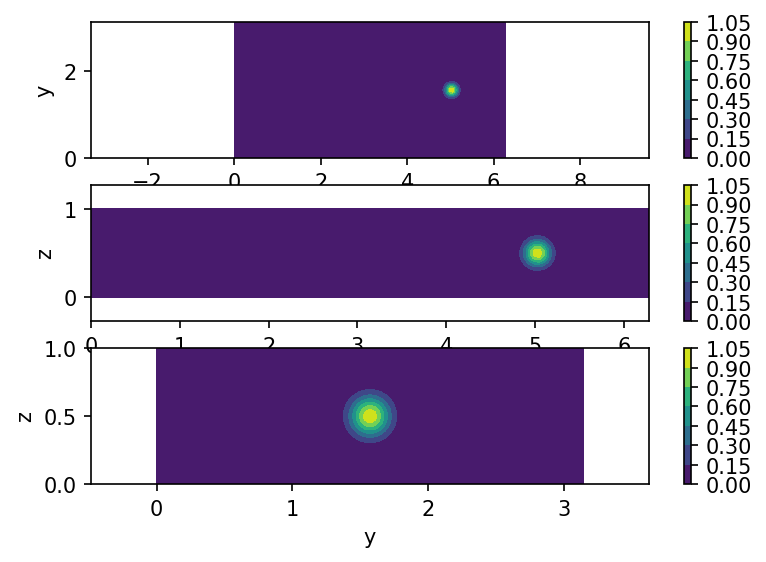

In [6]:
path = dir + 'turbulence_128_128_64_3Dgaussian'
Path(path).mkdir(parents=True, exist_ok=True)
fig = write_array_to_file(path + '/theta.IC.01', gaussian_ic(domain, dims, mu_L=np.array([0.2, 0.5, 0.5])), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.2, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.02', gaussian_ic(domain, dims, mu_L=np.array([0.5, 0.5, 0.5])), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.5, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.03', gaussian_ic(domain, dims, mu_L=np.array([0.8, 0.5, 0.5])), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.8, 0.5, 0.5]))


### 1D gaussian in 3D solution

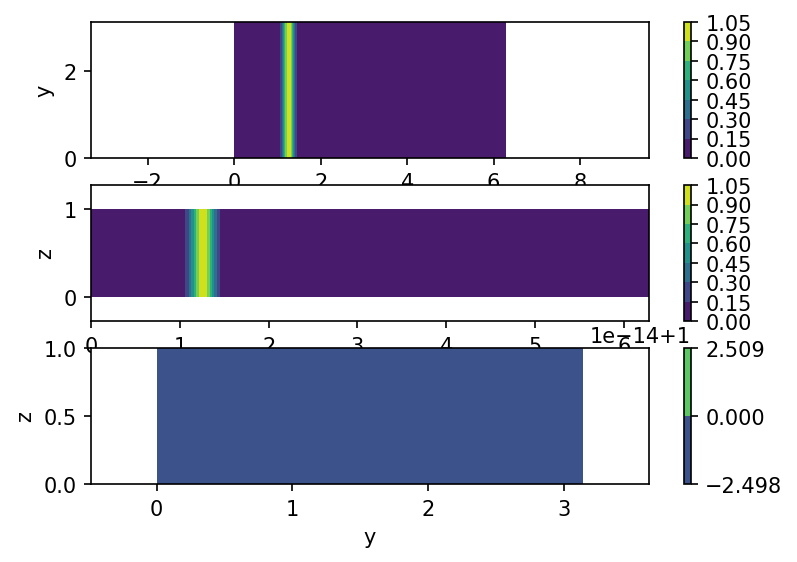

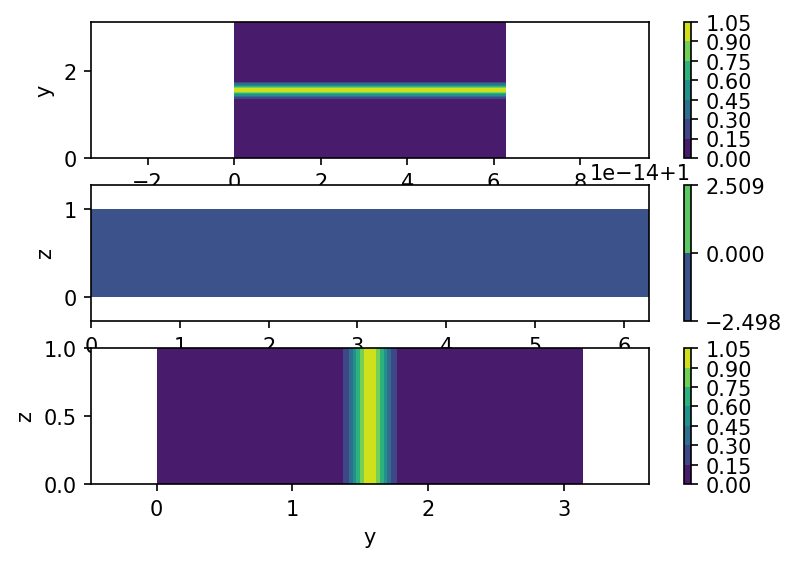

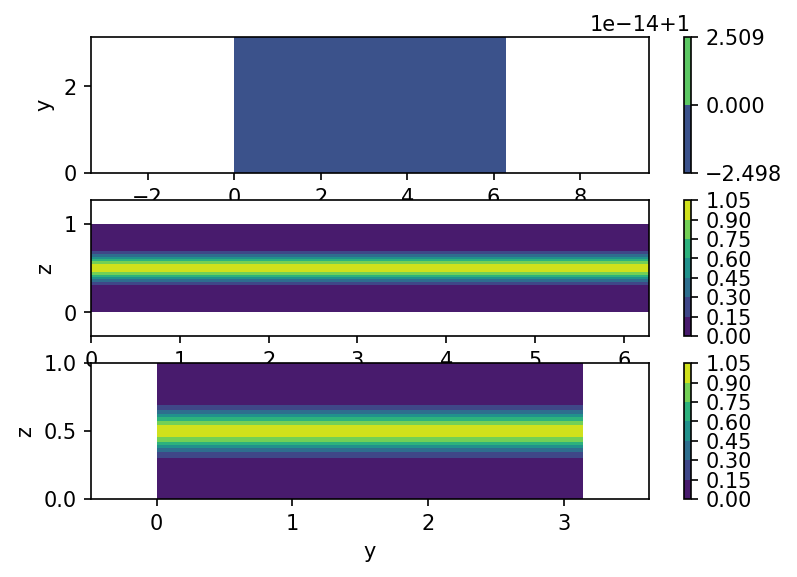

In [7]:
path = dir + 'turbulence_128_128_64_gaussian_xyz'
Path(path).mkdir(parents=True, exist_ok=True)
fig = write_array_to_file(path + '/theta.IC.01', gaussian_ic(domain, dims, mu_L=np.array([0.2, 0.5, 0.5]), ho_axis='x'), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.2, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.02', gaussian_ic(domain, dims, mu_L=np.array([0.5, 0.5, 0.5]), ho_axis='y'), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.5, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.03', gaussian_ic(domain, dims, mu_L=np.array([0.8, 0.5, 0.5]), ho_axis='z'), gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.8, 0.5, 0.5]))


# Validation

Validation based on previous literature{cite}`kimTransportPassiveScalars1989`. The setup of initial and boundary conditions in the original paper are
$$
\begin{aligned}
&\theta_i (x, y, z, 0) = 0.5(1-y^2)\\
& \theta_i (x, -1, z, t) = 0, \quad \theta_i (x, 1, z, t) = 0
\end{aligned}
$$


However, in LESGO, the normal direction is $z$ instead of $y$ and the simulation is running on a half channel. So that the transformed IC and BCs are
$$
\begin{aligned}
&\theta_i (x, \hat{y}, \hat{z}, 0) = 0.5(2\hat{z} - \hat{z}^2 )\\
& \theta_i (x, \hat{y}, \hat{z}=0, t) = 0, \quad \frac{\partial \theta_i}{\partial \hat{z}} (x, \hat{y}, \hat{z}=1, t) = 0
\end{aligned}
$$
which is based on 
$$
\hat{z} = y+1,\quad \forall y \in [-1, 0] \quad \& \quad \hat{y} = z, \quad\forall z \in [0, \pi].
$$

Shape of xx: (128, 128, 64)


Text(0, 0.5, 'T')

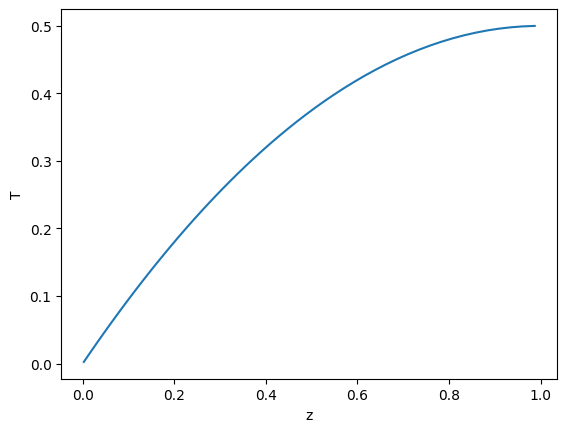

In [7]:
dims = [128, 128, 64]
domain = [2*np.pi, np.pi, 1]
x, y, z = xyz(domain, dims)
xc, yc, zc = XYZ(domain, dims)

theta = 0.5 * (2*zc - zc**2)
fig, ax = plt.subplots()
ax.plot(z, theta[0, 0, :])
ax.set_xlabel('z')
ax.set_ylabel('T')

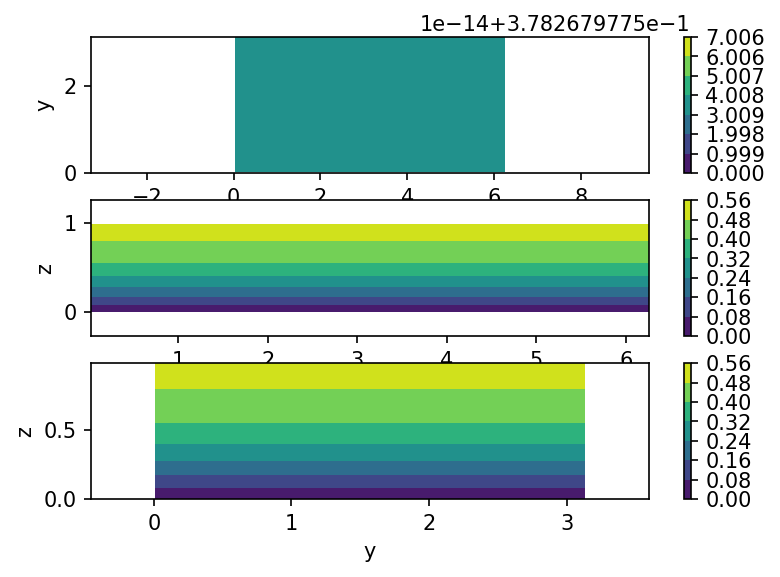

In [4]:
path = dir + 'validation1_128_128_64'
Path(path).mkdir(parents=True, exist_ok=True)
fig = write_array_to_file(path + '/theta.IC.01', theta, gen_fig=True, domain=domain, dims=dims, mu_L=np.array([0.5, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.02', theta, gen_fig=False, domain=domain, dims=dims, mu_L=np.array([0.5, 0.5, 0.5]))
fig = write_array_to_file(path + '/theta.IC.03', theta, gen_fig=False, domain=domain, dims=dims, mu_L=np.array([0.5, 0.5, 0.5]))
